### Aim: 
##### to identify factors that contribute to spin shift in the assay 

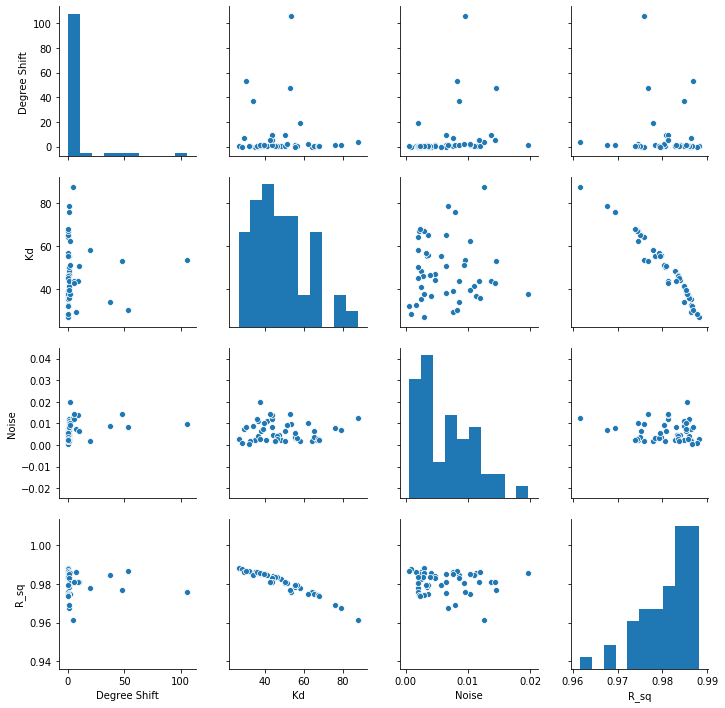

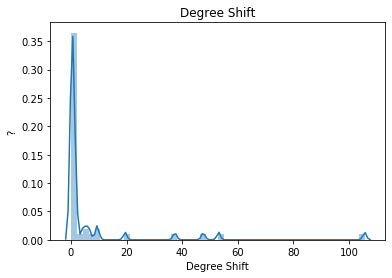

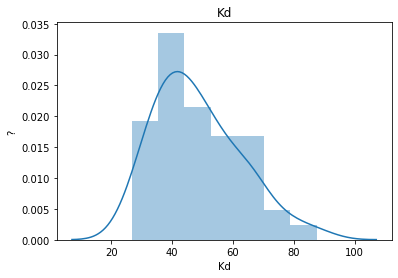

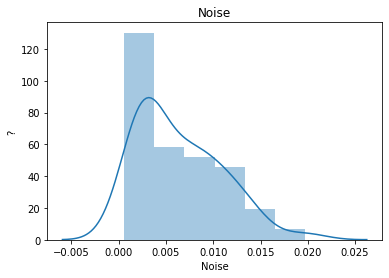

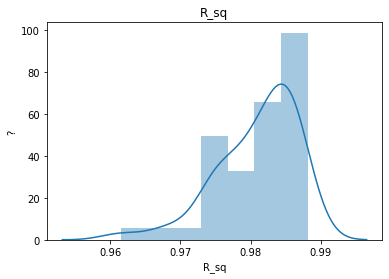

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Data/20191217_PlateMetrics.csv',index_col =0)

sns.pairplot(data[['Degree Shift', 'Kd', 'Noise', 'R_sq']])
plt.show()

for i in ['Degree Shift', 'Kd', 'Noise', 'R_sq']:
    sns.distplot(data[i],norm_hist = True)
    plt.title(i)
    plt.ylabel('?')
    plt.show()

### I think there's an anomaly in the degree shifts, I'll see what it looks like without 

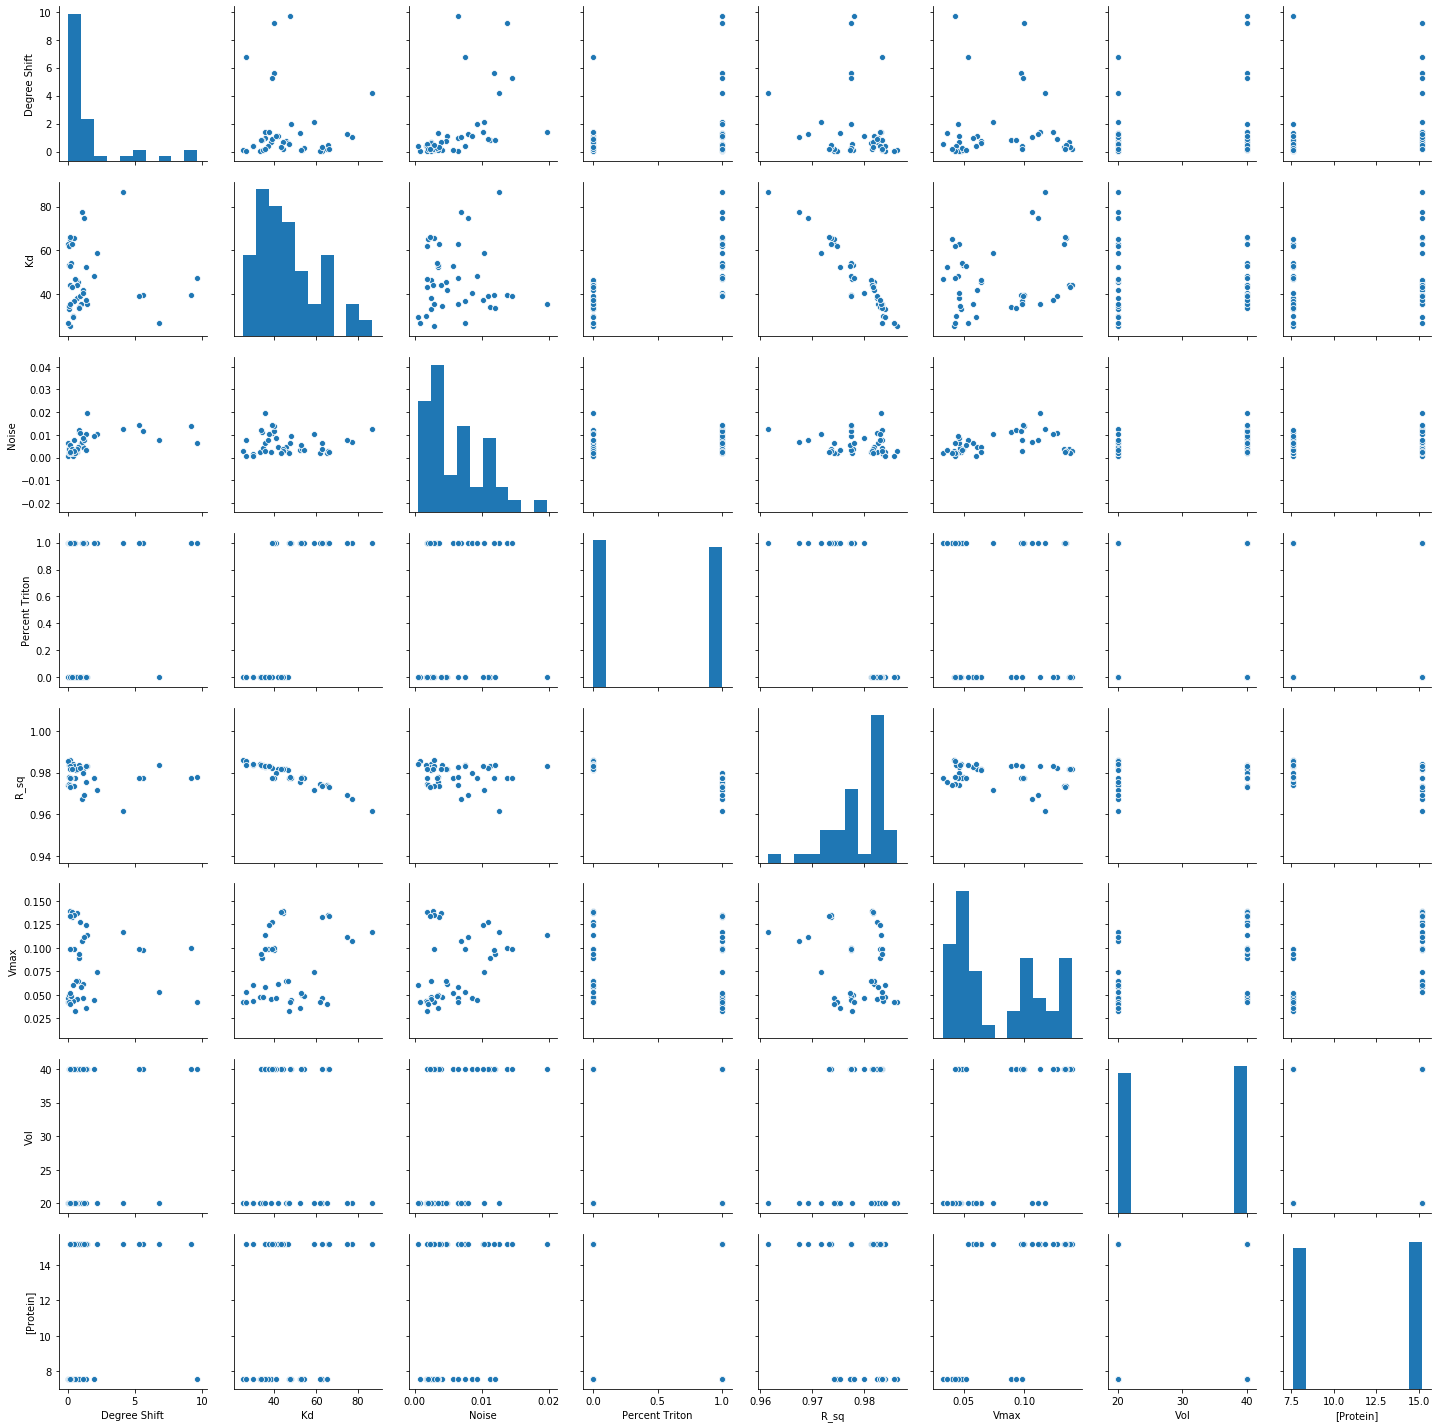

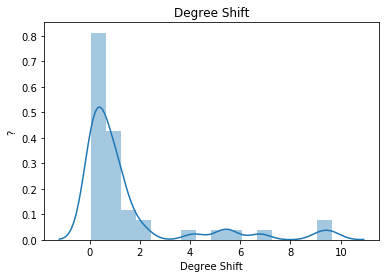

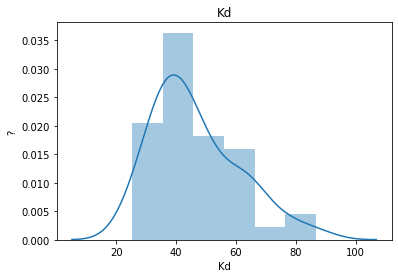

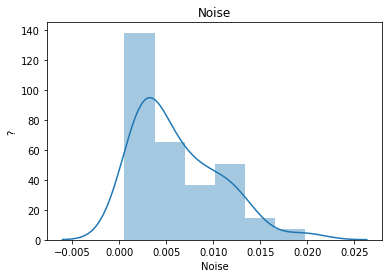

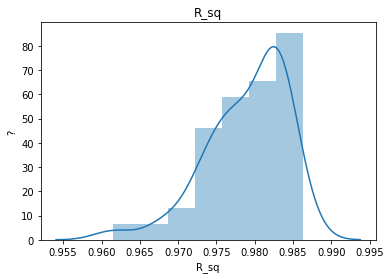

In [133]:
df = data.loc[data['Degree Shift']<10]

sns.pairplot(df)
plt.show()

for i in ['Degree Shift', 'Kd', 'Noise', 'R_sq']:
    sns.distplot(df[i],norm_hist = True)
    plt.title(i)
    plt.ylabel('?')
    plt.show()

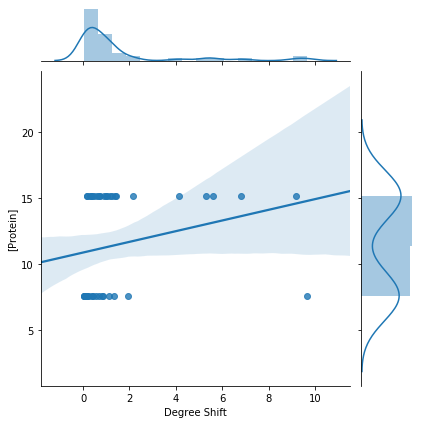

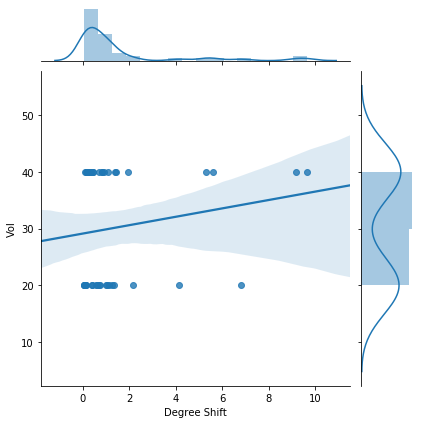

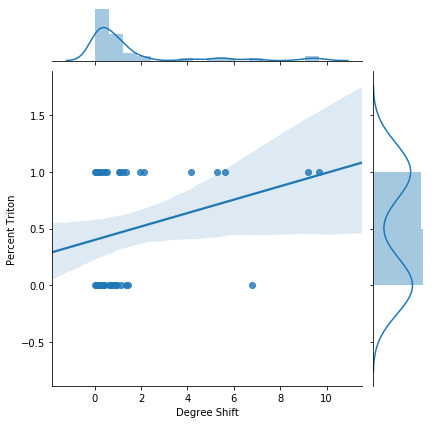

In [134]:
for i in ['[Protein]','Vol','Percent Triton']:
    sns.jointplot( 'Degree Shift', i,data=df, kind="reg")
    plt.show()

100%|██████████| 4999/4999 [00:02<00:00, 2469.45it/s]


test loss = 0.03149012476205826


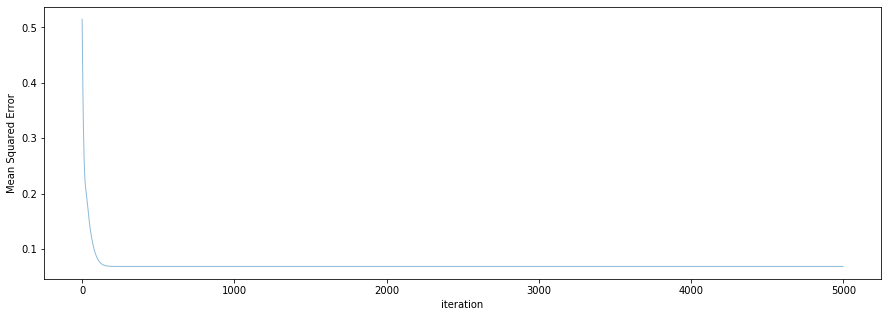

In [135]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

y = df[['Degree Shift']]
x = df[['Percent Triton','Vol','[Protein]']]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
X_train, X_test, y_train, y_test = torch.tensor(X_train,dtype = torch.float),\
torch.tensor(X_test,dtype = torch.float),\
torch.tensor(y_train,dtype = torch.float),\
torch.tensor(y_test,dtype = torch.float)

'''
class dataset(Dataset):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]
    
        
train_loader = DataLoader(dataset=dataset(X_train,y_train),
                          batch_size=4,
                          shuffle=True,
                          num_workers=1)

loss_record = []
for epoch in tqdm(range(1,100)):
    for i, batch in enumerate(train_loader, 0):
        x_,y_ = batch
        y_pred = lin.forward(x_)
        loss = loss_fn(y_, y_pred)
        loss_record.append(loss.item())
        loss.backward()
        opt.step()
        opt.zero_grad()'''

lin = nn.Linear(X_train.shape[1],1,bias = True)
opt = torch.optim.Adam(lin.parameters(),lr = 1e-2)
loss_fn = nn.MSELoss()

loss_record = []
for epoch in tqdm(range(1,5_000)):
    y_pred = lin.forward(X_train)
    loss = loss_fn(y_train, y_pred)
    loss_record.append(loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()
    
y_pred = lin.forward(X_test)
error = loss_fn(y_test,y_pred)
print('test loss = {}'.format(error.item()))

plt.figure(figsize=(15,5))
plt.plot(np.array(loss_record),alpha = 0.5,lw = 1)
plt.xlabel('iteration')
plt.ylabel('Mean Squared Error')
plt.show()

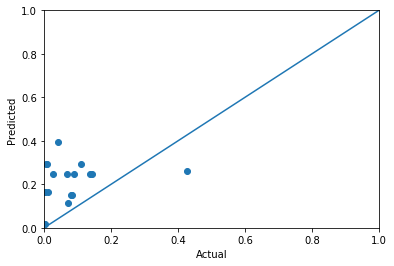

In [136]:
plt.scatter(x=y_test,y=y_pred.detach())
plt.plot([0,1],[0,1])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [137]:
weights = pd.DataFrame(lin.weight.detach().numpy(),columns = ['Percent Triton','Vol','[Protein]'])
weights

,Percent Triton,Vol,[Protein]
0,0.146327,0.131479,0.098906
